<h1>Module 5: Model Evaluation and Refinement</h1>

We have built models and made predictions of vehicle prices. Now we will determine how accurate these predictions are. 

<h1>Table of content</h1>
<ul>
    <li><a href="#ref1">Model Evaluation </a></li>
    <li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="#ref3">Ridge Regression </a></li>
    <li><a href="#ref4">Grid Search</a></li>
</ul>

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [3]:
df.to_csv('module_5_auto.csv')

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [8]:
%%capture
! pip install ipywidgets

In [9]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\sailesh\Anacondaa3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<h2>Functions for plotting</h2>

In [87]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [88]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Part 1: Training and Testing</h1>

<p>An important step in testing the model is to split the data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y</b>:</p>

In [14]:
y_data=df['price']


In [15]:
x_data=df.drop('price',axis=1)

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.15,random_state=1)

print('the no of test sampels: ',x_test.shape[0])
print('The no of training sampels: ',x_train.shape[0])

the no of test sampels:  31
The no of training sampels:  170


In [23]:
# Write your code below and press Shift+Enter to execute 
x_train1,x_test1,y_train1,y_test1=train_test_split(x_data,y_data,test_size=0.4,random_state=0)

print('The no of x_test1 sampels: ',x_test1.shape[0])
print('The no of x_train1 sampels ',x_train.shape[0])

The no of x_test1 sampels:  81
The no of x_train1 sampels  170


In [24]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

In [25]:
lre.fit(x_train[['horsepower']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's Calculate the R^2 on the test data:

In [26]:
lre.score(x_test[['horsepower']],y_test)

0.707688374146705

In [27]:
lre.score(x_train[['horsepower']],y_train)

0.6449517437659684

 <h3>R^2 on the test data using 90% of the data for training data</h3>

In [29]:
# Write your code below and press Shift+Enter to execute 
x_train1,x_test1,y_train1,y_test1=train_test_split(x_data,y_data,test_size=0.1,random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)


0.7340722810055448

<h2>Cross-validation Score</h2>


In [30]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4. 

In [37]:
Rscore=cross_val_score(lre,x_data[['horsepower']],y_data,cv=4)

In [38]:
Rscore

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [39]:
print('The mean of the folds are',Rscore.mean(),'and the standard deviation is ',Rscore.std())

The mean of the folds are 0.522009915042119 and the standard deviation is  0.2911839444756029


In [45]:
-1*cross_val_score(lre,x_data[['horsepower']],y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

The average R^2 using two folds, the average R^2 for the second fold utilizing the horsepower as a feature :

In [46]:
from sklearn.model_selection import cross_val_predict

In [49]:
yhat=cross_val_predict(lre,x_data[['horsepower']],y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [50]:
lr=LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
yhat_train=lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [53]:
yhat_test=lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

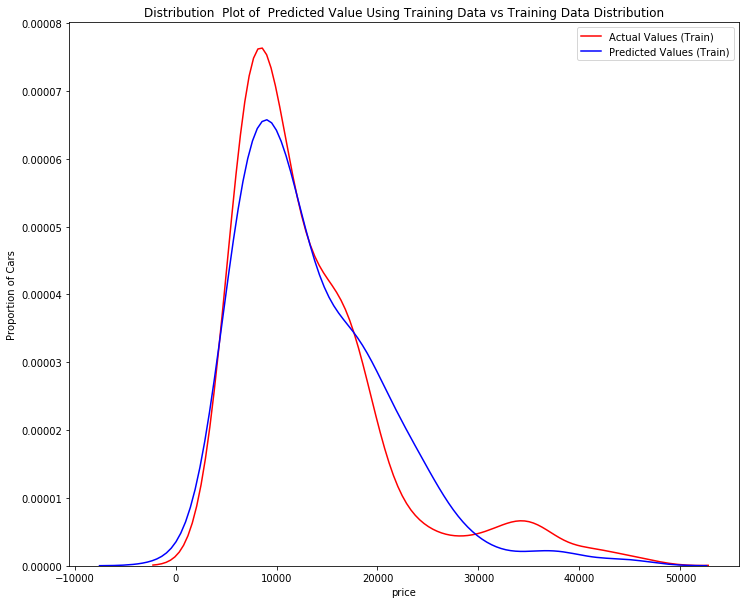

In [56]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 

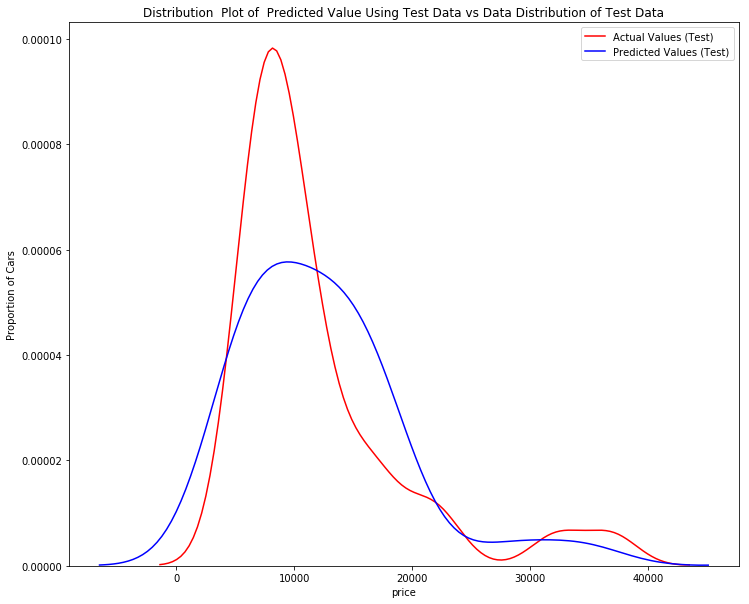

In [57]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figur 2: Plot of predicted value using the test data compared to the test data. 

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [91]:
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

creating a linear regression model "poly" and training it.

In [92]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
yhat=poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.70501896,  7308.02845162, 12213.7843307 , 18893.19108677,
       19995.88963424])

Let's take the first five predicted values and compare it to the actual targets. 

In [94]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677]
True values: [ 6295. 10698. 13860. 13499.]


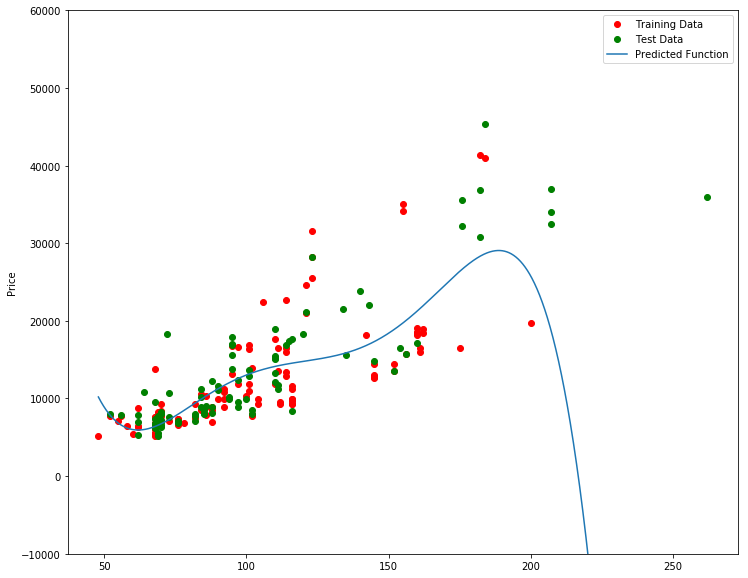

In [95]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figur 4: A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

 R^2 of the training data:

In [96]:
poly.score(x_train_pr,y_train)

0.5567716902635091

 R^2 of the test data:

In [97]:
poly.score(x_test_pr,y_test)

-29.87141885918752

The R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

The R^2 changes on the test data for different order polynomials and plot the results:

Text(3,0.75,'Maximum R^2 ')

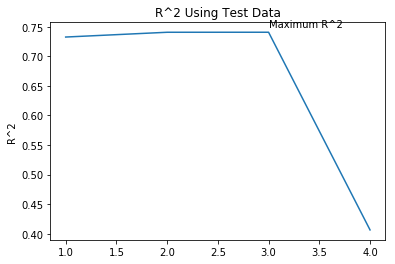

In [112]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)

plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    


                            Order

We see the R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.

In [175]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [176]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h2 id="ref3">Part 3: Ridge regression</h2> 

In [145]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [146]:
from sklearn.linear_model import Ridge

In [148]:
Rigemodel=Ridge(alpha=0.1)

In [150]:
Rigemodel.fit(x_train_pr,y_train)

C:\Users\sailesh\Anacondaa3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.029716e-16
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [155]:
yhat=Rigemodel.predict(x_test_pr)


In [156]:
print('predicted : ',yhat[0:4])
print('test set : ',y_test[0:4].values)

predicted :  [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set :  [ 6295. 10698. 13860. 13499.]


We select the value of Alfa that minimizes the test error, for example, we can use a for loop. 

In [161]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

We can plot out the value of R^2 for different Alphas 

TypeError: 'str' object is not callable

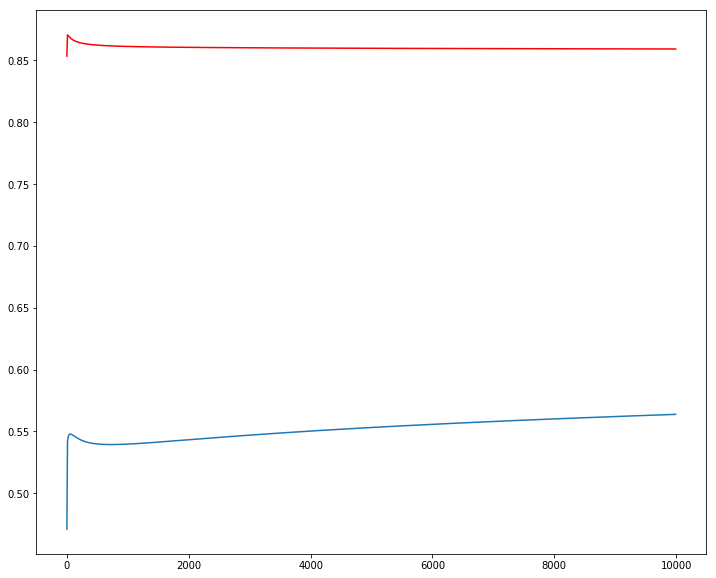

In [165]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.ylabel('R^2')
plt.legend()

                                            alpha

Figure 6:The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa 

The red line in figure 6 represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.   

<h2 id="ref4">Part 4: Grid Search</h2>

In [166]:
from sklearn.model_selection import GridSearchCV

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

In [167]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [169]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [170]:
Grid1=GridSearchCV(RR,parameters1,cv=4)

In [171]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)

GridSearchCV(cv=4, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [172]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [173]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841164983103615

In [174]:
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)